

# Import All Libraries



In [101]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

# Read All Datasets

In [62]:
movie_titles = pd.read_csv('/content/Movie_Id_Titles.csv')
users = pd.read_csv('/content/Dataset.csv')

In [63]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [64]:
users.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


# Exploratory data

## Exploratory Data for Movie Titles

In [65]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [66]:
movie_titles.title.unique()

array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
       'B. Monkey (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)

In [67]:
print("There are {} movies".format(len(movie_titles['title'].unique())))

There are 1664 movies


## Exploratory Data for Users

In [68]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [69]:
users.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [70]:
print("There are {} users".format(len(users['user_id'].unique())))

There are 944 users


# Data Preprocessing

##Merge Movie Titles file and Users File


In [71]:
data = pd.merge(movie_titles, users, on="item_id", how="left")
data.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


# Data Preparation

Check missing value

In [72]:
data.isnull().sum()

item_id      0
title        0
user_id      0
rating       0
timestamp    0
dtype: int64

Because there is no missing value, we can move to the next step

Sort all data based on item_id and put them into a fix_data variable

In [73]:
fix_data = data.sort_values('item_id', ascending=True)
fix_data.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
308,1,Toy Story (1995),303,5,879466966
307,1,Toy Story (1995),886,4,876031433
306,1,Toy Story (1995),789,3,880332089
305,1,Toy Story (1995),295,4,879517580


In [74]:
print("There are {} data in fix_data".format(len(fix_data['item_id'].unique())))

There are 1682 data in fix_data


Check all titles in data

In [75]:
fix_data.title.unique()

array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
       'B. Monkey (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)

Check movie with title: Toy Story (1995)

In [76]:
fix_data[fix_data['title']== 'Toy Story (1995)']

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
308,1,Toy Story (1995),303,5,879466966
307,1,Toy Story (1995),886,4,876031433
306,1,Toy Story (1995),789,3,880332089
305,1,Toy Story (1995),295,4,879517580
...,...,...,...,...,...
150,1,Toy Story (1995),99,4,886518459
151,1,Toy Story (1995),254,3,887347350
152,1,Toy Story (1995),533,4,879192521
149,1,Toy Story (1995),59,2,888203053


Make a preparation variable from fix_data and sort based on item_id

In [77]:
preparation = fix_data
preparation.sort_values('item_id')

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
11,1,Toy Story (1995),145,3,882181396
225,1,Toy Story (1995),371,4,877487440
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
...,...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1,889289570
99999,1679,B. Monkey (1998),863,3,889289491
100000,1680,Sliding Doors (1998),863,2,889289570
100001,1681,You So Crazy (1994),896,3,887160722


In [78]:
preparation = preparation.drop_duplicates('item_id')
preparation

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
536,2,GoldenEye (1995),846,5,883948949
641,3,Four Rooms (1995),751,3,889299391
814,4,Get Shorty (1995),875,3,876466687
944,5,Copycat (1995),925,4,884718156
...,...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1,889289570
99999,1679,B. Monkey (1998),863,3,889289491
100000,1680,Sliding Doors (1998),863,2,889289570
100001,1681,You So Crazy (1994),896,3,887160722


Convert item_id and title into list

In [79]:
item_id = preparation['item_id'].tolist()
title = preparation['title'].tolist()

Create dictionary for item_id and title

In [80]:
data_new = pd.DataFrame({
    'item_id': item_id,
    'title': title
})

In [81]:
data_new

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


# Modeling with Content Based Filtering

In [82]:
data_new.sample(5)

,item_id,title
1073,1074,Reality Bites (1994)
578,579,Fatal Instinct (1993)
1377,1378,Rhyme & Reason (1997)
965,966,"Affair to Remember, An (1957)"
913,914,Wild Things (1998)


## TF-IDF Vectorizer

In [83]:
tf = TfidfVectorizer()
tf.fit(data_new['title']) 
tf.get_feature_names_out(['title'])

array(['000', '100', '101', ..., 'zone', 'zorro', 'zulu'], dtype=object)

Fit transform into matrix

In [84]:
tfidf_matrix = tf.fit_transform(data_new['title'])
tfidf_matrix.shape

(1682, 2429)

1682 is a data and 2429 is matrix for book title 

In [85]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=data_new.title
).sample(22, axis=1).sample(10, axis=0)

,masters,bobby,moonlight,outlaw,america,hideaway,sorcerer,xinghua,handbook,maine,...,village,barcelona,ness,antonin,richard,preacher,side,symphonie,crude,ground
title,,,,,,,,,,,,,,,,,,,,,
Ninotchka (1939),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rhyme & Reason (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mediterraneo (1991),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Swept from the Sea (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
French Twist (Gazon maudit) (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coneheads (1993),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Van, The (1996)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sunset Park (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Get on the Bus (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.0884727 , 0.06895985, ..., 0.        , 0.        ,
        0.        ],
       [0.0884727 , 1.        , 0.08659404, ..., 0.        , 0.        ,
        0.        ],
       [0.06895985, 0.08659404, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Make a dataframe from cosine_sim with row and colomn's name is title

In [88]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_new['title'], columns=data_new['title'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1682, 1682)


title,"Island of Dr. Moreau, The (1996)",Target (1995),In & Out (1997),Three Colors: White (1994),"Death in the Garden (Mort en ce jardin, La) (1956)"
title,,,,,
Pete's Dragon (1977),0.000000,0.000000,0.000000,0.000000,0.000000
"Paper, The (1994)",0.044803,0.000000,0.000000,0.087214,0.029909
Ruby in Paradise (1993),0.000000,0.000000,0.170777,0.000000,0.070424
Two Bits (1995),0.000000,0.093357,0.000000,0.000000,0.000000
Emma (1996),0.067167,0.000000,0.000000,0.000000,0.000000
Calendar Girl (1993),0.000000,0.000000,0.000000,0.000000,0.000000
Nixon (1995),0.000000,0.116509,0.000000,0.000000,0.000000
Son in Law (1993),0.000000,0.000000,0.176733,0.000000,0.072881
Hideaway (1995),0.000000,0.116509,0.000000,0.000000,0.000000


## Make a Recommendation

In [89]:
def movie_recommendations(title, similarity_data=cosine_sim_df, items=data_new[['item_id', 'title']], k=5):

    # take data using argpartition to partition indirectly from the axis that given    
    # Change dataframe into numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    
    #Take the bigest similarity data from avaliable index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop book title therefore book title that we type does not appear
    closest = closest.drop(title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [90]:
movie_recommendations("Toy Story (1995)")

,title,item_id
0,"Pyromaniac's Love Story, A (1995)",1072
1,"Story of Xinghua, The (1993)",1344
2,"Philadelphia Story, The (1940)",478
3,FairyTale: A True Story (1997),308
4,"NeverEnding Story III, The (1994)",548


# Collaborative Filtering

## Encoded user_id

In [91]:
# Change used_id into list without same value
user_id = preparation['user_id'].unique().tolist()
# user_id encoding
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
# numeric endoding to user id
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}

print('user_id list: ', user_id)
print('\nencoded user_id: ', user_to_user_encoded)
print('\nnumeric encoded into user_id', user_encoded_to_user)

user_id list:  [308, 846, 751, 875, 925, 655, 255, 610, 916, 906, 593, 497, 642, 664, 447, 535, 806, 585, 725, 896, 330, 682, 835, 862, 624, 344, 886, 758, 385, 815, 567, 305, 297, 254, 477, 268, 405, 429, 715, 660, 790, 450, 747, 409, 201, 185, 876, 13, 457, 828, 109, 908, 778, 397, 883, 712, 49, 840, 5, 551, 757, 592, 566, 881, 922, 868, 339, 280, 586, 749, 346, 452, 536, 889, 527, 707, 521, 417, 299, 798, 795, 312, 222, 807, 892, 533, 847, 932, 796, 733, 501, 936, 894, 56, 1, 857, 453, 526, 648, 50, 823, 830, 435, 643, 334, 717, 314, 415, 864, 694, 804, 731, 788, 204, 893, 930, 534, 831, 342, 860, 343, 223, 693, 618, 293, 230, 178, 661, 194, 727, 82, 561, 686, 530, 495, 710, 608, 422, 407, 420, 870, 940, 373, 776, 829, 538, 345, 919, 924, 781, 234, 421, 239, 607, 658, 897, 741, 844, 699, 210, 6, 805, 877, 632, 709, 198, 899, 826, 885, 802, 769, 537, 931, 938, 628, 825, 476, 374, 765, 606, 578, 513, 463, 921, 764, 854, 783, 871, 716, 502, 181, 76, 782, 532, 680, 656, 890, 668, 756, 4

## Encoded item_id

In [92]:
# Change used_id into list without same value
item_id = preparation['item_id'].unique().tolist()
# user_id encoding
item_to_item_encoded = {x: i for i, x in enumerate(item_id)}
# numeric endoding to user id
item_encoded_to_item = {i: x for i, x in enumerate(item_id)}

print('user_id list: ', item_id)
print('\nencoded user_id: ', item_to_item_encoded)
print('\nnumeric encoded into user_id', item_encoded_to_item)

user_id list:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

Mapping user_id and item_id into dataframe

In [93]:
preparation['user'] = preparation['user_id'].map(user_to_user_encoded)
preparation['item'] = preparation['item_id'].map(item_to_item_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
preparation.head()

,item_id,title,user_id,rating,timestamp,user,item
0,1,Toy Story (1995),308,4,887736532,0,0
536,2,GoldenEye (1995),846,5,883948949,1,1
641,3,Four Rooms (1995),751,3,889299391,2,2
814,4,Get Shorty (1995),875,3,876466687,3,3
944,5,Copycat (1995),925,4,884718156,4,4


In [95]:
#Get number of user
num_users = len(user_to_user_encoded)

#Get number of movie item
num_items = len(item_to_item_encoded)

#Change rating into float data type
preparation['rating'] = preparation['rating'].values.astype(np.float32)

#Get minimum rating
min_rating = min(preparation['rating'])

#Get maximum rating
max_rating = max(preparation['rating'])

print("Number of user: {} \nNumber of movie item: {} \nMinimum rating: {} \nMax Rating: {}".format(num_users, num_items, min_rating, max_rating))

Number of user: 524 
Number of movie item: 1682 
Minimum rating: 1.0 
Max Rating: 5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
preparation = preparation.sample(frac=1, random_state = 42)
preparation

,item_id,title,user_id,rating,timestamp,user,item
98950,1394,Swept from the Sea (1997),206,1.0,888179981,470,1393
82689,744,Michael Collins (1996),768,3.0,880136272,369,743
99868,1606,Deceiver (1997),463,2.0,889936565,182,1605
6801,50,Star Wars (1977),450,5.0,882371415,41,49
28223,189,"Grand Day Out, A (1992)",592,5.0,882955583,61,188
...,...,...,...,...,...,...,...
96105,1131,Safe (1995),385,3.0,879445587,28,1130
98478,1295,Kicked in the Head (1997),721,3.0,877137214,439,1294
87608,861,Nosferatu a Venezia (1986),13,3.0,882139774,47,860
99386,1460,Sleepover (1995),234,3.0,892335460,150,1459


##Split Dataset

In [97]:
x = preparation[['user', 'item']].values
y = preparation['rating'].apply(lambda x: (x-min_rating) / (max_rating - min_rating)).values

In [98]:
#divide 80% train and 20% test
train_indices = int(0.8 * preparation.shape[0])
x_train, x_test, y_train, y_test = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [99]:
print("x train shape: {} \ny train shape: {}".format(x_train.shape, y_train.shape))
print("x test shape: {} \ny test shape: {}".format(x_test.shape, y_test.shape))

x train shape: (1345, 2) 
y train shape: (1345,)
x test shape: (337, 2) 
y test shape: (337,)


#Train Model

In [102]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_items, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_items = num_items
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.item_embedding = layers.Embedding( # layer embeddings resto
        num_items,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.item_bias = layers.Embedding(num_items, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # Get layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) #Get layer embedding 2
    item_vector = self.item_embedding(inputs[:, 1]) # Get layer embedding 3
    item_bias = self.item_bias(inputs[:, 1]) # Get layer embedding 4
 
    dot_user_item = tf.tensordot(user_vector, item_vector, 2) 
 
    x = dot_user_item + user_bias + item_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [103]:
model = RecommenderNet(num_users, num_items, 50)
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [104]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_test, y_test)
)

Epoch 1/100
169/169 [==============================] - 1s 4ms/step - loss: 0.6918 - root_mean_squared_error: 0.3120 - val_loss: 0.6902 - val_root_mean_squared_error: 0.3134
Epoch 2/100
169/169 [==============================] - 1s 3ms/step - loss: 0.6826 - root_mean_squared_error: 0.3046 - val_loss: 0.6872 - val_root_mean_squared_error: 0.3110
Epoch 3/100
169/169 [==============================] - 0s 3ms/step - loss: 0.6736 - root_mean_squared_error: 0.2972 - val_loss: 0.6845 - val_root_mean_squared_error: 0.3088
Epoch 4/100
169/169 [==============================] - 0s 3ms/step - loss: 0.6669 - root_mean_squared_error: 0.2916 - val_loss: 0.6819 - val_root_mean_squared_error: 0.3067
Epoch 5/100
169/169 [==============================] - 1s 3ms/step - loss: 0.6595 - root_mean_squared_error: 0.2854 - val_loss: 0.6794 - val_root_mean_squared_error: 0.3048
Epoch 6/100
169/169 [==============================] - 1s 3ms/step - loss: 0.6494 - root_mean_squared_error: 0.2766 - val_loss: 0.6773 

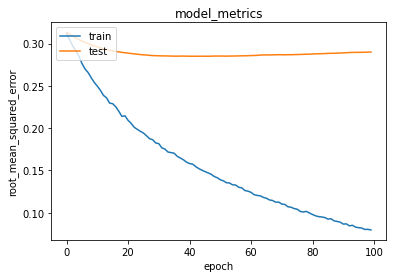

In [105]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Get Recommendation for User

In [106]:
movie = data_new
# Get User Sample
user_id = users['user_id'].sample(1).iloc[0]
movie_watched_by_user = users[users['user_id'] == user_id]

movie_not_watched = movie[~movie['item_id'].isin(movie_watched_by_user['user_id'].values)]['item_id'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(item_to_item_encoded.keys()))
)
 
movie_not_watched = [[item_to_item_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [110]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    item_encoded_to_item.get(movie_not_watched [x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .item_id.values
)
 
movie_df_rows = movie[movie['item_id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.item_id, ':', row.title)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie[movie['item_id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.item_id, ':', row.title)

Showing recommendations for users: 187
Movie with high ratings from user
--------------------------------
64 : Shawshank Redemption, The (1994)
137 : Big Night (1996)
173 : Princess Bride, The (1987)
275 : Sense and Sensibility (1995)
707 : Enchanted April (1991)
--------------------------------
Top 10 movie recommendation
--------------------------------
126 : Spitfire Grill, The (1996)
169 : Wrong Trousers, The (1993)
262 : In the Company of Men (1997)
543 : Misérables, Les (1995)
597 : Eraser (1996)
631 : Crying Game, The (1992)
791 : Baby-Sitters Club, The (1995)
923 : Raise the Red Lantern (1991)
1164 : Zeus and Roxanne (1997)
1554 : Safe Passage (1994)
